<h1> Imports </h1>

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns   
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

<h1> Dataset Downloaded </h1>

In [2]:
import kagglehub
path = kagglehub.dataset_download("zusmani/pakistans-largest-ecommerce-dataset")
# print("Path to dataset files:", path)

<h1> Pre-Processing </h1>

In [3]:
df = pd.read_csv(f"{path}/Pakistan Largest Ecommerce Dataset.csv")
df.head(5)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.shape)
print(df.info)

(1048575, 26)
<bound method DataFrame.info of           item_id          status created_at  \
0        211131.0        complete   7/1/2016   
1        211133.0        canceled   7/1/2016   
2        211134.0        canceled   7/1/2016   
3        211135.0        complete   7/1/2016   
4        211136.0  order_refunded   7/1/2016   
...           ...             ...        ...   
1048570       NaN             NaN        NaN   
1048571       NaN             NaN        NaN   
1048572       NaN             NaN        NaN   
1048573       NaN             NaN        NaN   
1048574       NaN             NaN        NaN   

                                                       sku   price  \
0                                        kreations_YI 06-L  1950.0   
1        kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0   
2                                       Ego_UP0017-999-MR0  2450.0   
3                                           kcc_krone deal   360.0   
4                          

In [5]:
print(df.columns)

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


<h3> Dropping Last 5 Empty Columns </h3>

In [6]:
df = df.iloc[:, :-5]
df = df.dropna(how = 'all')

<h3> Removing trails from column name </h3>

In [7]:
df.rename(columns={' MV ': 'MV'}, inplace=True)
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

<h3> assigned appropriate data types to columns </h3>

In [8]:
df[['Customer ID', 'item_id']] = df[['Customer ID', 'item_id']].astype(str)
df[['qty_ordered', 'Year', 'Month']] = df[['qty_ordered', 'Year', 'Month']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  object 
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  int32  
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14  MV                     584524 non-null  o

In [9]:
df.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1,849.0,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018,8,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018,8,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018,8,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018,8,2018-7,8-2018,FY19,113474.0
584523,905208.0,processing,8/28/2018,MATSAM5B10F91A9B6AB,108640.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"217,280",2018,8,2018-7,8-2018,FY19,113474.0


<h3> Correcting Date Format </h3>

In [10]:
df['created_at'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d')
df.tail(2)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584522,905207.0,processing,2018-08-28,MATSAM5B1509B4696EA,87300.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018,8,2018-7,8-2018,FY19,113474.0
584523,905208.0,processing,2018-08-28,MATSAM5B10F91A9B6AB,108640.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"217,280",2018,8,2018-7,8-2018,FY19,113474.0


In [11]:
df.describe()

,price,qty_ordered,grand_total,discount_amount,Year,Month
count,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000
mean,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654
std,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305
min,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000
25%,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000
50%,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000
75%,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000
max,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000


<h3> Sorting values based on dates </h3>

In [12]:
df = df.sort_values('created_at')

<h3> Changed a few column values to a better format </h3>

In [13]:
df['payment_method'] = df['payment_method'].replace('cod', 'cash on delivery')
df['status'] = df['status'].replace('cod', 'cash on delivery')
df['item_id'] = df['item_id'].str.replace('.0', '', regex=False)
df['Customer ID'] = df['Customer ID'].str.replace('.0', '', regex=False)

In [14]:
df.tail(2)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584459,905138,canceled,2018-08-28,ENTNOB5A4633C950FAD,15399.0,1,29199.0,100562333,Entertainment,NaN,...,bankalfalah,8/28/2018,Gross,"15,399",2018,8,2018-8,8-2018,FY19,114151
584523,905208,processing,2018-08-28,MATSAM5B10F91A9B6AB,108640.0,2,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"217,280",2018,8,2018-7,8-2018,FY19,113474


<h3> Checking for any more missing values </h3>

In [15]:
print(df.isnull().sum())

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137178
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
MV                            0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                   0
dtype: int64


<h3> Handling remaining missing values </h3>

In [16]:
import warnings
warnings.filterwarnings("ignore")
df['status'].fillna('Unknown', inplace=True)
df['sku'].fillna('Unknown', inplace=True)
df['Customer Since'].fillna('Unknown', inplace=True)
df['category_name_1'].fillna('Unknown', inplace=True)
df.drop(columns=['sales_commission_code'], inplace=True)


In [17]:
print(df['status'].value_counts())
print(df['payment_method'].value_counts())
print(df['category_name_1'].value_counts())

status
complete            233685
canceled            201249
received             77290
order_refunded       59529
refund                8050
cash on delivery      2859
paid                  1159
closed                 494
payment_review          57
pending                 48
processing              33
holded                  31
Unknown                 15
fraud                   10
pending_paypal           7
\N                       4
exchange                 4
Name: count, dtype: int64
payment_method
cash on delivery     271960
Payaxis               97641
Easypay               82900
jazzwallet            35145
easypay_voucher       31176
bankalfalah           23065
jazzvoucher           15633
Easypay_MA            14028
customercredit         7555
apg                    1758
ublcreditcard           882
cashatdoorstep          732
mcblite                 723
mygateway               669
internetbanking         472
productcredit           125
marketingexpense         45
financesettlement

<h2> Univariate Analysis </h2>

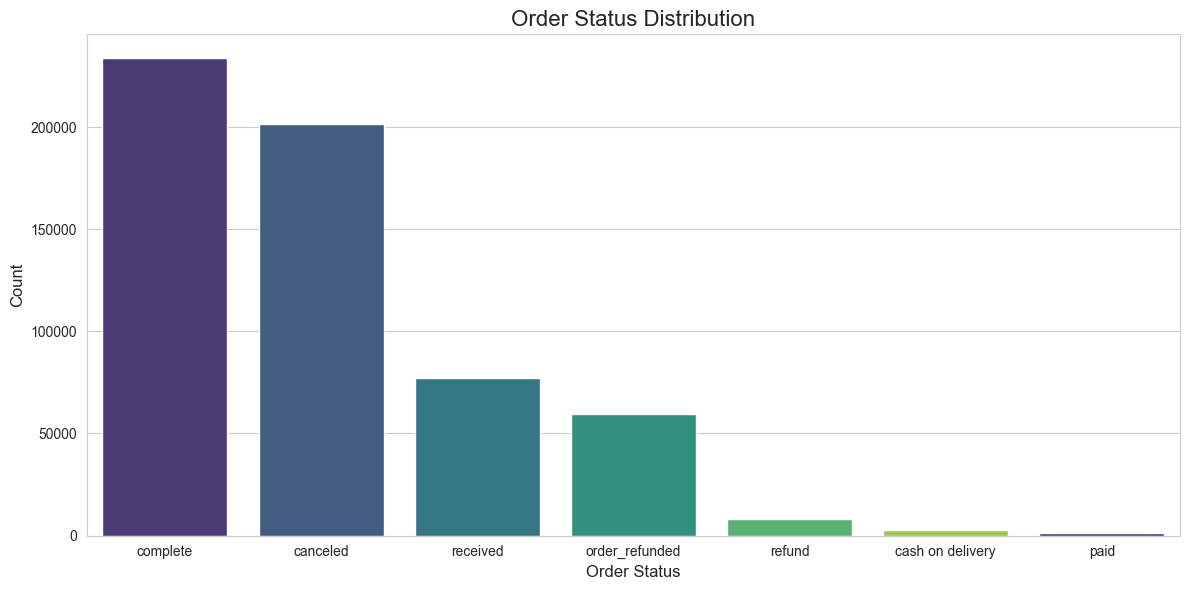

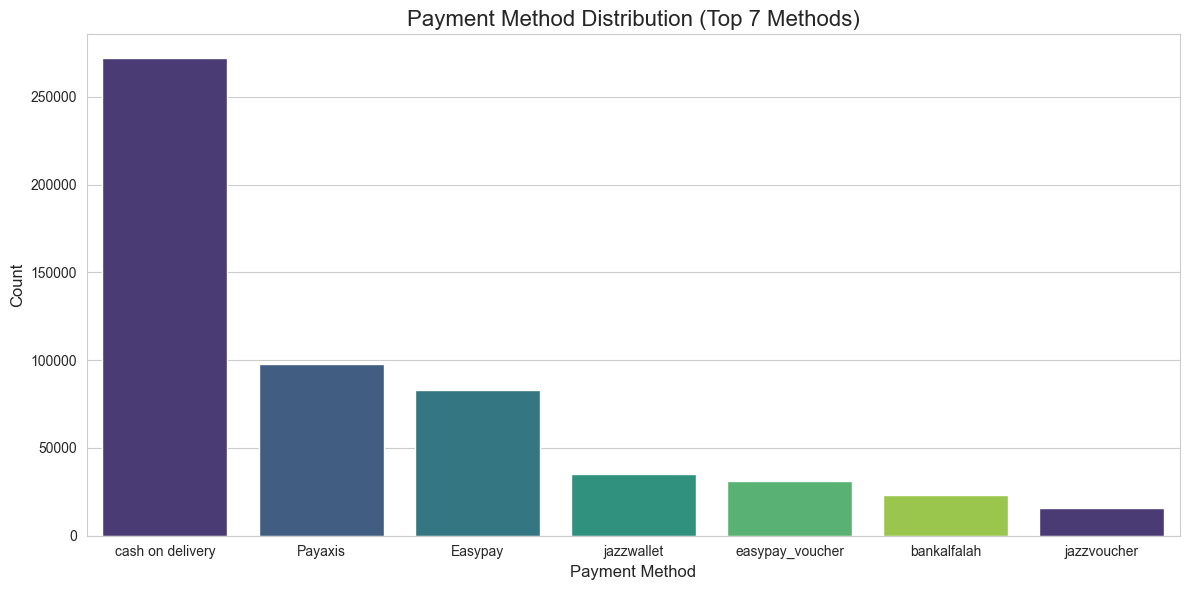

In [18]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")
status_order = df['status'].value_counts().index.tolist()
try:
    cutoff_index = status_order.index('paid') + 1
    filtered_statuses = status_order[:cutoff_index]
    df_filtered_status = df[df['status'].isin(filtered_statuses)]
except ValueError:
    df_filtered_status = df

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_filtered_status, x='status', order=filtered_statuses, palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), ha="center")
plt.title('Order Status Distribution', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()
payment_counts = df['payment_method'].value_counts(normalize=True)
cumulative_payment_counts = payment_counts.cumsum()
n_payment_methods = (cumulative_payment_counts[cumulative_payment_counts <= 0.95].count()) + 1
if n_payment_methods > len(payment_counts):
  n_payment_methods = len(payment_counts)
top_payment_methods = payment_counts.index[:n_payment_methods].tolist()
df_filtered_payment = df[df['payment_method'].isin(top_payment_methods)]
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_filtered_payment, x='payment_method', order=top_payment_methods, palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), ha="center")
plt.title(f'Payment Method Distribution (Top {n_payment_methods} Methods)', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['Working Date'] = pd.to_datetime(df['Working Date'], errors='coerce')


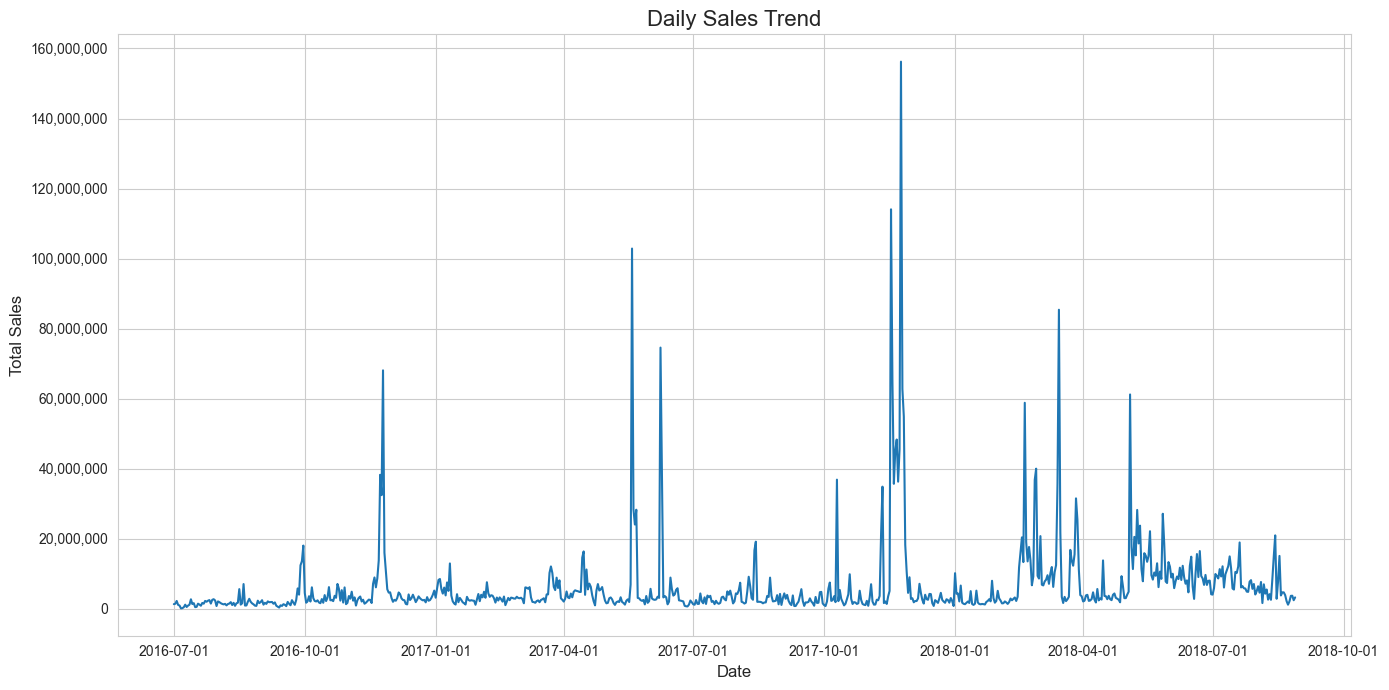

In [20]:
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")
df['created_at'] = pd.to_datetime(df['created_at'])
daily_sales = df.groupby(df['created_at'].dt.date)['grand_total'].sum().reset_index()
daily_sales.rename(columns={'created_at': 'Date', 'grand_total': 'Total Sales'}, inplace=True)
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=daily_sales, x='Date', y='Total Sales', palette=palette)
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)


ax.ticklabel_format(style='plain', axis='y')  # Remove scientific notation
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0, ha='center') 
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

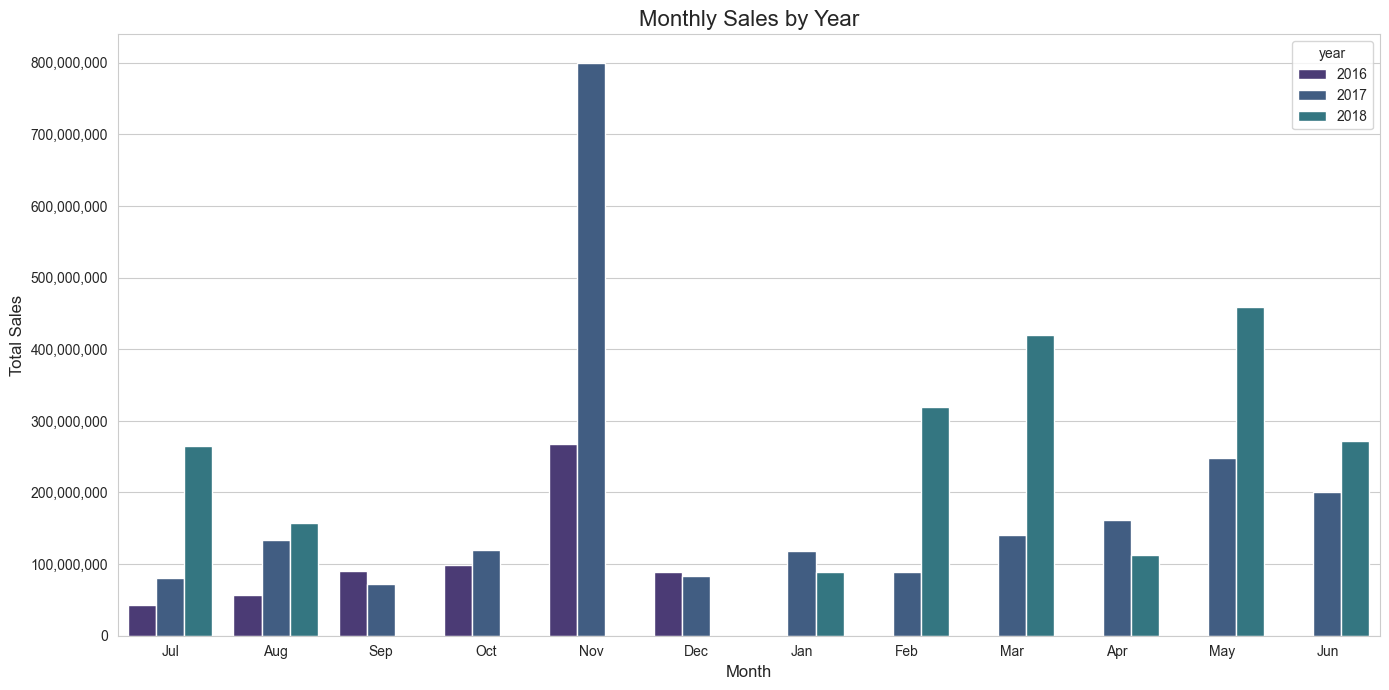

In [21]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
monthly_sales = df.groupby(['year', 'month'])['grand_total'].sum().reset_index()
monthly_sales['month_abbr'] = monthly_sales['month'].apply(lambda x: pd.Timestamp(f'2023-{x}-01').strftime('%b'))
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=monthly_sales, x='month_abbr', y='grand_total', hue='year', palette=palette)
plt.title('Monthly Sales by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(ax.get_xticklabels(), ha="center") 

plt.tight_layout()
plt.show()

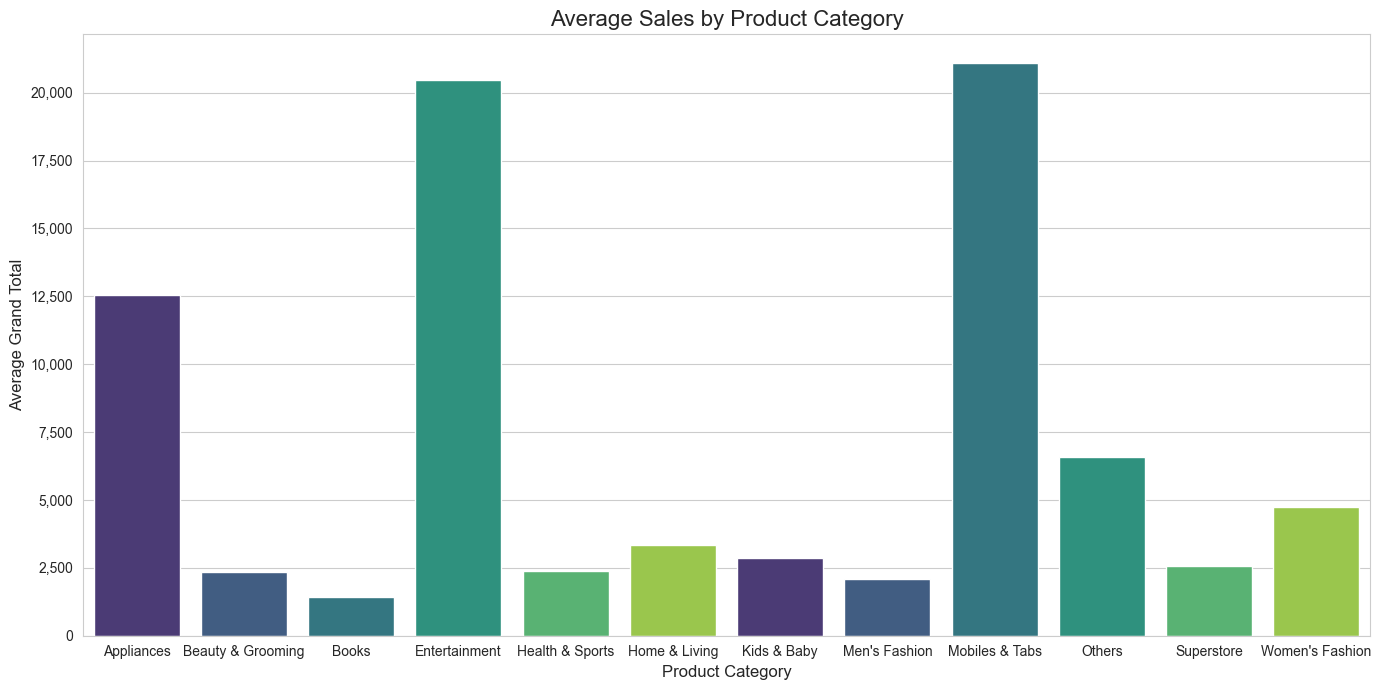

In [22]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")
category_sales = df.groupby('category_name_1')['grand_total'].mean().reset_index()
category_name_mapping = {
    'Mobiles & Tablets': 'Mobiles & Tabs',
    'Men\'s Fashion': 'Men\'s Fashion',
    'Women\'s Fashion': 'Women\'s Fashion',
    'Appliances': 'Appliances',
    'Home & Living': 'Home & Living',
    'Entertainment': 'Entertainment',
    'Superstore': 'Superstore',
    'Books': 'Books',
    'Kids & Baby': 'Kids & Baby',
    'Others': 'Others',
    'Groceries': 'Groceries',
    'Health & Sports': 'Health & Sports',
    'Beauty & Grooming': 'Beauty & Grooming'
}
category_sales['category_abbr'] = category_sales['category_name_1'].map(category_name_mapping) #Abbreviated names.
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=category_sales, x='category_abbr', y='grand_total', palette=palette)
plt.title('Average Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Grand Total', fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(ax.get_xticklabels(), ha="center") 
plt.tight_layout()
plt.show()

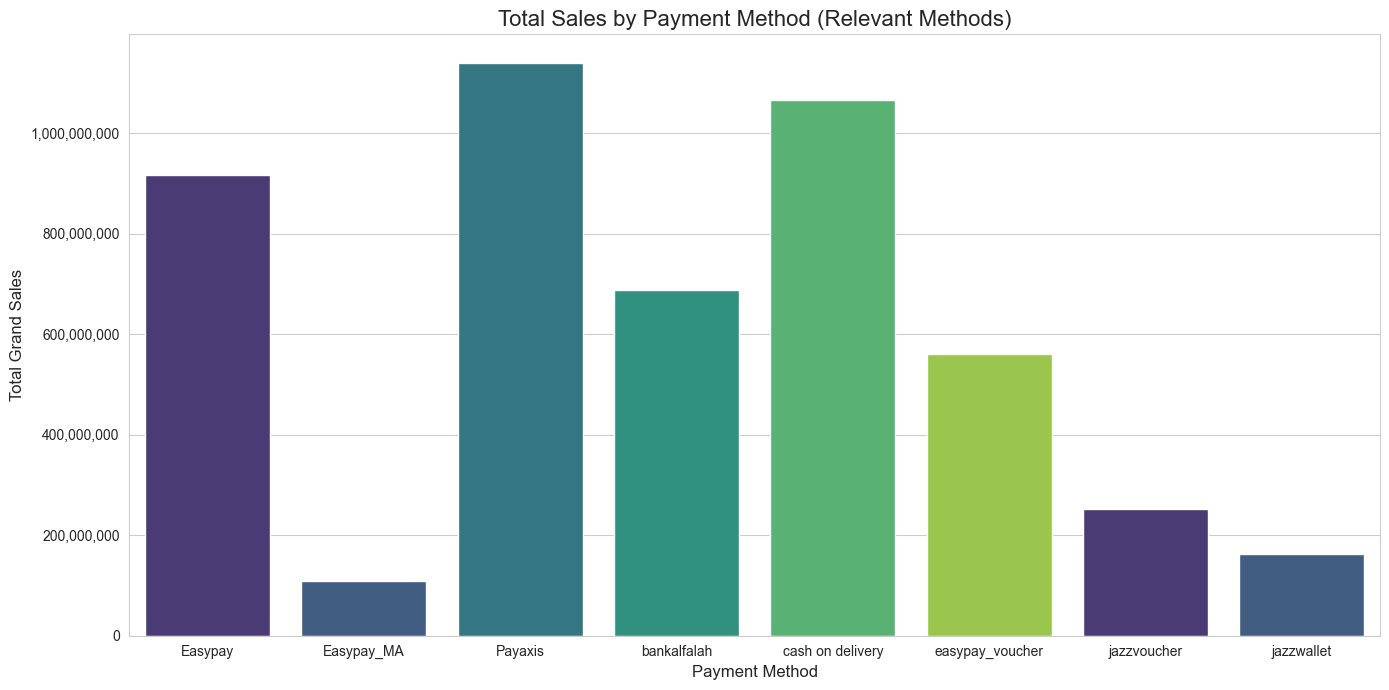

In [23]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
palette = sns.color_palette("viridis")

payment_sales = df.groupby('payment_method')['grand_total'].sum().reset_index()

total_sales = payment_sales['grand_total'].sum()
payment_sales['percentage'] = (payment_sales['grand_total'] / total_sales) * 100
relevant_payments = payment_sales[payment_sales['percentage'] > 1]['payment_method'].tolist() 

df_relevant_payments = payment_sales[payment_sales['payment_method'].isin(relevant_payments)] 

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_relevant_payments, x='payment_method', y='grand_total', palette=palette) 

plt.title('Total Sales by Payment Method (Relevant Methods)', fontsize=16) 
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Grand Sales', fontsize=12)

ax.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(ax.get_xticklabels(), ha="center") 

plt.tight_layout()
plt.show()

<h2> More Visualizations </h2>

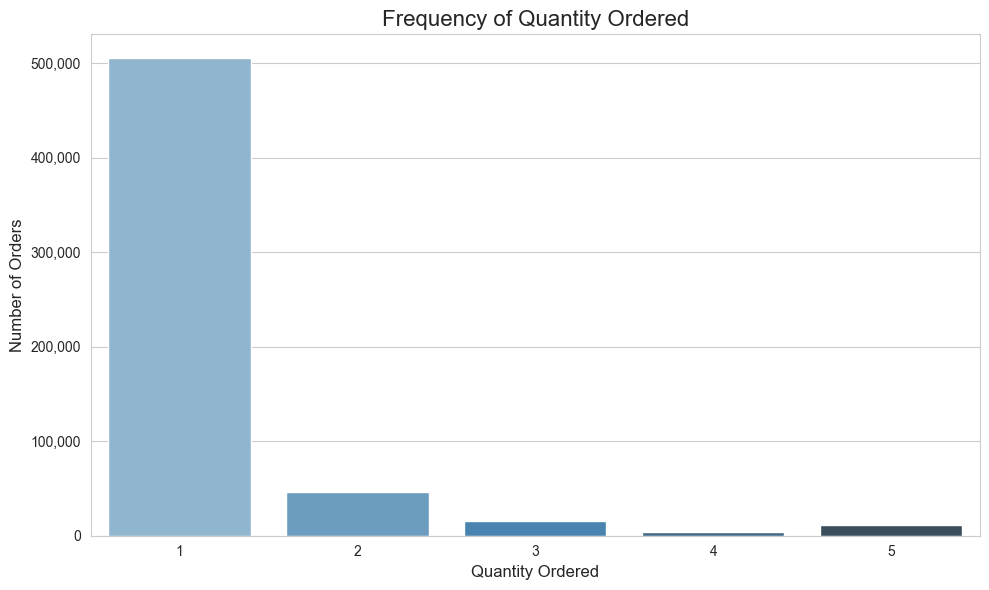

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Count occurrences of each quantity ordered
quantity_counts = df['qty_ordered'].value_counts().sort_index()

# Ensure 1 is the most prominent by removing 0 if it's misleading
if 0 in quantity_counts.index:
    quantity_counts = quantity_counts[quantity_counts.index > 0]  

# Restrict to a reasonable range (e.g., 1-5 for clarity)
quantity_counts = quantity_counts[quantity_counts.index <= 5]

# Set a visually appealing style
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Choose a more distinct, readable palette
palette = sns.color_palette("Blues_d", n_colors=len(quantity_counts))

# Convert x-axis values to strings for categorical display
ax = sns.barplot(x=quantity_counts.index.astype(str), 
                 y=quantity_counts.values, 
                 palette=palette)

# Title and labels
plt.title('Frequency of Quantity Ordered', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Format y-axis for better readability (e.g., 100,000 instead of 100000)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()


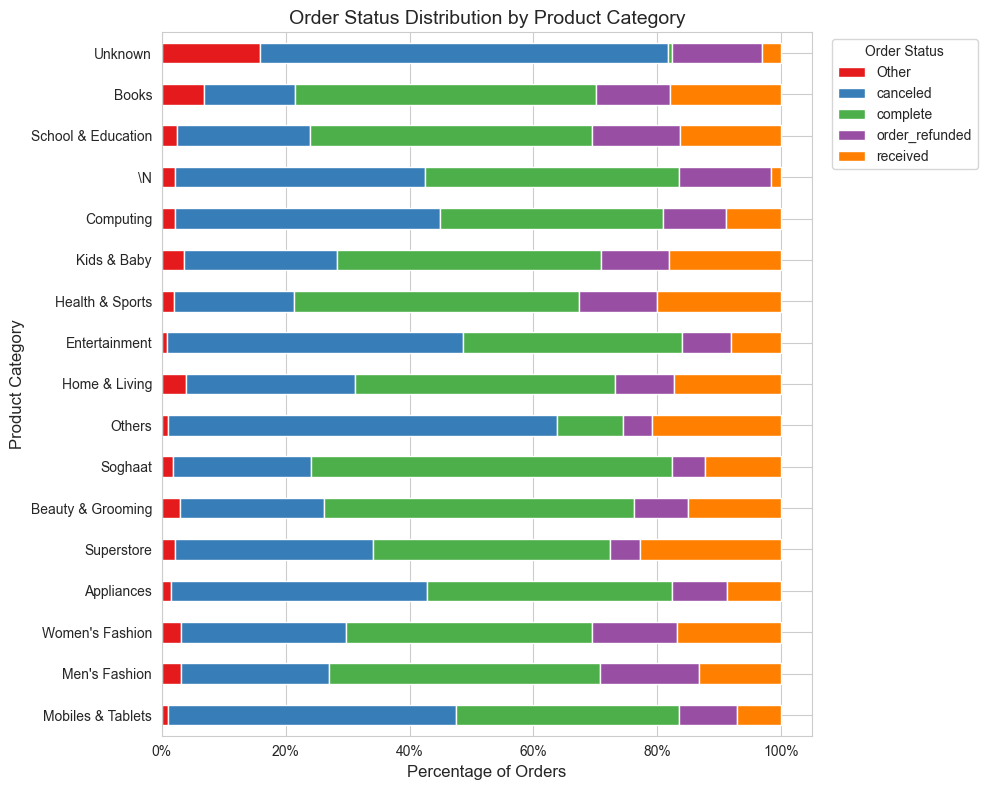

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- Sample DataFrame Setup (Use your actual data) ---
# df = <your cleaned dataframe>
relevant_statuses = ['complete', 'canceled', 'order_refunded', 'received']
df['status_simplified'] = df['status'].apply(lambda s: s if s in relevant_statuses else 'Other')
category_status_counts_simplified = df.groupby(['category_name_1', 'status_simplified']).size().unstack(fill_value=0)

# Convert counts to percentage within each category
category_status_proportions = category_status_counts_simplified.div(
    category_status_counts_simplified.sum(axis=1), axis=0
) * 100

# (Optional) Sort categories by total number of orders (descending)
cat_totals = category_status_counts_simplified.sum(axis=1)
sorted_categories = cat_totals.sort_values(ascending=False).index
category_status_proportions = category_status_proportions.loc[sorted_categories]

# Define a custom color palette (for distinct colors)
statuses = category_status_proportions.columns
colors = sns.color_palette("Set1", n_colors=len(statuses))

# Create a larger figure for clarity
plt.figure(figsize=(10, 8))

# Horizontal stacked bar chart
ax = category_status_proportions.plot(
    kind='barh', 
    stacked=True, 
    color=colors,
    ax=plt.gca()
)

plt.title('Order Status Distribution by Product Category', fontsize=14)
plt.xlabel('Percentage of Orders', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

# Format the x-axis as percentages
ax.xaxis.set_major_formatter(ticker.PercentFormatter())

# Move legend outside the plot
plt.legend(title='Order Status', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


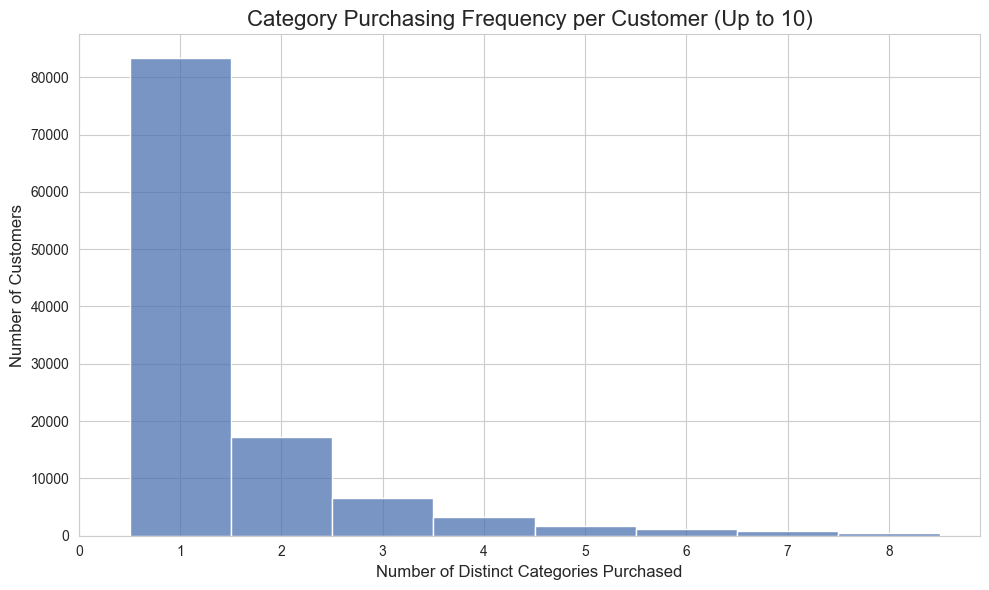

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -- Data preparation (assuming you have the DataFrame below) --
customer_category_counts = df.groupby('Customer ID')['category_name_1'].nunique().reset_index()
customer_category_counts.rename(columns={'category_name_1': 'Category Count'}, inplace=True)

# Filter to only include up to 10 categories (you can decide whether to group 10+ into a single bin)
filtered_counts = customer_category_counts[customer_category_counts['Category Count'] <= 8]

# Use a nicer style
sns.set_style('whitegrid')

# Create figure
plt.figure(figsize=(10, 6))

# Create histogram with a discrete axis from 0 to 10 (inclusive)
bins = np.arange(0, 10)  # 0 to 11 as bin edges, so it captures counts up to 10
sns.histplot(
    data=filtered_counts, 
    x='Category Count', 
    bins=bins, 
    discrete=True,
    color='#4C72B0',       # Example color from a pleasing palette
    edgecolor='white'      # White edges make bars visually distinct
)

plt.title('Category Purchasing Frequency per Customer (Up to 10)', fontsize=16)
plt.xlabel('Number of Distinct Categories Purchased', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(range(0, 9))  # Label x-axis from 0 to 10
plt.tight_layout()
plt.show()
